<a href="https://colab.research.google.com/github/sitiluthfiatinsolihah/BelajarCloneRespository/blob/main/forestfires_20210120015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import library
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import Normalizer, OneHotEncoder, StandardScaler,MinMaxScaler


In [ ]:
# # Read dataset - Diabetes
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/forestfires.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# select with no duplicated data
df = df[~df.duplicated()]

In [ ]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 513 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       513 non-null    int64  
 1   Y       513 non-null    int64  
 2   month   513 non-null    object 
 3   day     513 non-null    object 
 4   FFMC    513 non-null    float64
 5   DMC     513 non-null    float64
 6   DC      513 non-null    float64
 7   ISI     513 non-null    float64
 8   temp    513 non-null    float64
 9   RH      513 non-null    int64  
 10  wind    513 non-null    float64
 11  rain    513 non-null    float64
 12  area    513 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 56.1+ KB


In [ ]:
# Number of Unqie Value in Every Columns
df.nunique()

X          9
Y          7
month     12
day        7
FFMC     106
DMC      215
DC       219
ISI      119
temp     192
RH        75
wind      21
rain       7
area     251
dtype: int64

In [ ]:
df.describe() # Hanya menjalankan kolom dengan data numerik

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,4.678363,4.300195,90.637427,110.989279,549.155166,9.023587,18.887524,44.348928,4.010526,0.021832,12.891598
std,2.320059,1.230925,5.540920,64.191013,247.724594,4.575543,5.828128,16.358803,1.796613,0.297107,63.892586
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,440.900000,6.400000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.500000,8.400000,19.300000,42.000000,4.000000,0.000000,0.540000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [ ]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
datasets_1 = np.genfromtxt('/content/drive/MyDrive/Machine Learning/forestfires.csv', delimiter=',', dtype=str)

column_names = datasets_1[0]
data = datasets_1[1:]

df = pd.DataFrame(data, columns=column_names)

In [ ]:
from numpy import unique
for i in range(df.shape[1]):
    if len(unique(df.iloc[:, i])) <= 1:
        print(i)
    else:
        print(i, len(unique(df.iloc[:, i])))

0 9
1 7
2 12
3 7
4 106
5 215
6 219
7 119
8 192
9 75
10 21
11 7
12 251


In [ ]:
print(df.shape)
for a in column_names:
    df = df[df[a].str.contains('\?') == False]

print(df.shape)
df.drop_duplicates()
df.dropna()
df.isnull().sum()
print(df.shape)

(517, 13)
(517, 13)
(517, 13)


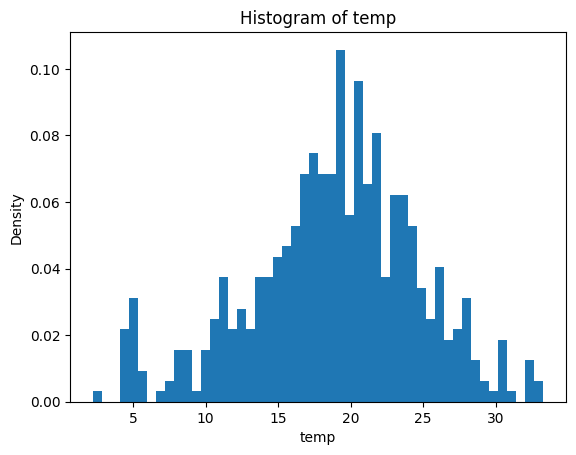

In [ ]:
df['temp'] = pd.to_numeric(df['temp'], errors='coerce')
ax = df['temp'].plot.hist(bins=50, density=True)

ax.set_xlabel('temp')
ax.set_ylabel('Density')
ax.set_title('Histogram of temp')

plt.show()

In [ ]:
df=df.drop('ISI',axis = 1)
np.random.seed(5)
data = df.to_numpy()
np.random.shuffle(data)
y = data[:,-1]
data =np.delete(data,[5],axis = 1)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

categorical_features=[2,3]
categorical_names = {}
for feature in categorical_features:
    le = LabelEncoder()
    le.fit(data[:, feature])
    data[:, feature] = le.transform(data[:, feature])
    categorical_names[feature] = le.classes_


t = [('cat', OneHotEncoder(),[2,3]),('num',MinMaxScaler(),[0,1,4,5,6,7,8,9,10,11])]

transformer = ColumnTransformer(transformers=t)
le= LabelEncoder()
y = le.fit_transform(y)
class_names = le.classes_
data = data.astype(float)

data_1 = data[0:3000]
y_1 = y[0:3000]

In [ ]:
df

,X,Y,month,day,FFMC,DMC,DC,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,8.2,51,6.7,0,0
1,7,4,oct,tue,90.6,35.4,669.1,18.0,33,0.9,0,0
2,7,4,oct,sat,90.6,43.7,686.9,14.6,33,1.3,0,0
3,8,6,mar,fri,91.7,33.3,77.5,8.3,97,4,0.2,0
4,8,6,mar,sun,89.3,51.3,102.2,11.4,99,1.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,27.8,32,2.7,0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,21.9,71,5.8,0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,21.2,70,6.7,0,11.16
515,1,4,aug,sat,94.4,146,614.7,25.6,42,4,0,0


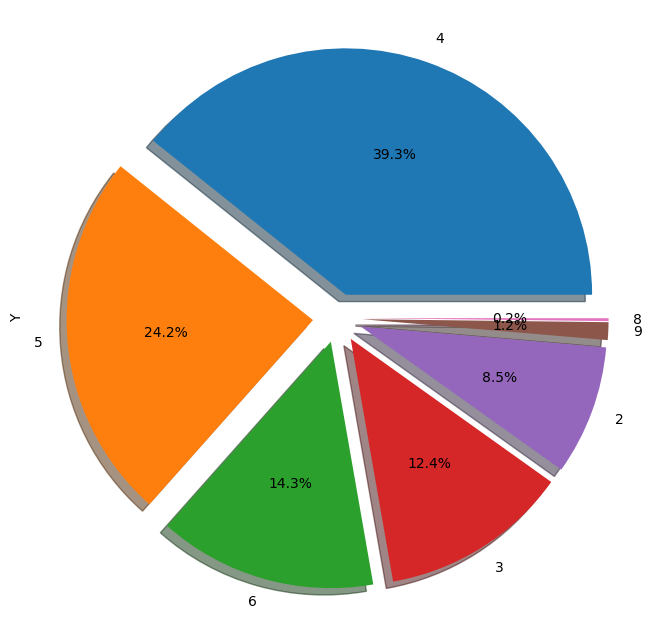

In [ ]:
# Pandas plotting with matplotlib
df['Y'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    object 
 1   Y       517 non-null    object 
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    object 
 5   DMC     517 non-null    object 
 6   DC      517 non-null    object 
 7   temp    517 non-null    float64
 8   RH      517 non-null    object 
 9   wind    517 non-null    object 
 10  rain    517 non-null    object 
 11  area    517 non-null    object 
dtypes: float64(1), object(11)
memory usage: 52.5+ KB


In [ ]:
df['DC'] = df['DC'].astype(str).str.split('.').str[0].astype(int)
df['RH'] = df['RH'].astype(str).str.split('.').str[0].astype(int)
df['wind'] = df['wind'].astype(str).str.split('.').str[0].astype(int)
df['FFMC'] = df['FFMC'].astype(str).str.split('.').str[0].astype(int)
df['area'] = df['area'].astype(str).str.split('.').str[0].astype(int)
df['X']=df['X'].astype(str).astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    object 
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    int64  
 5   DMC     517 non-null    object 
 6   DC      517 non-null    int64  
 7   temp    517 non-null    float64
 8   RH      517 non-null    int64  
 9   wind    517 non-null    int64  
 10  rain    517 non-null    object 
 11  area    517 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 52.5+ KB


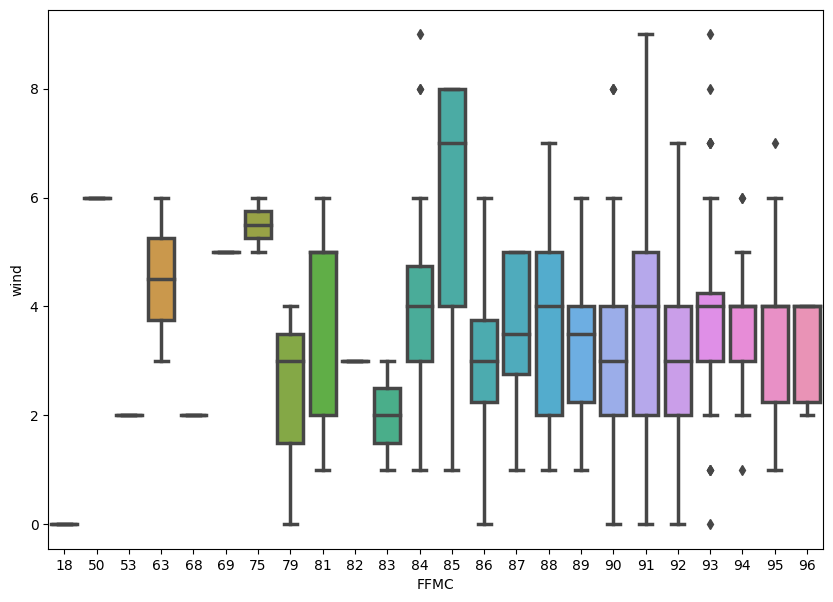

In [ ]:
# Seaborn with Matplotlib
fig=plt.gcf()
fig.set_size_inches(10,7)
#fig=sns.boxplot(x='Age', y='Hours per week', data=df,order=['<50K','>=50K'], linewidth=2.5)
fig=sns.boxplot(x='FFMC', y='wind', data=df, linewidth=2.5)

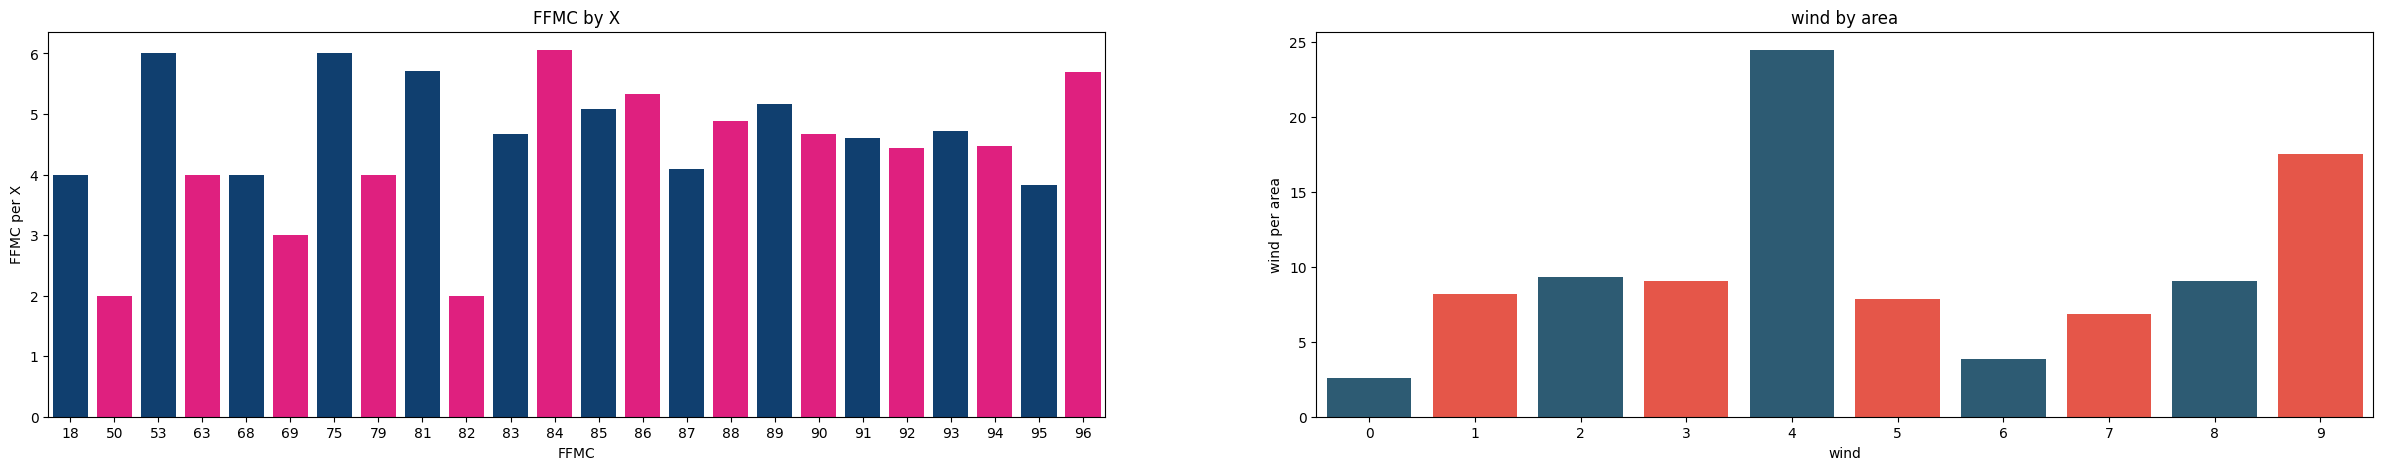

In [ ]:
fig, axarr = plt.subplots(1, 2, figsize=(30,5))
#a = sns.countplot(df['Age'], ax=axarr[0], palette=('#003f7f','#ff007f')).set_title('Income count by Age')
axarr[0].set_title('FFMC by X')
axarr[1].set_title('wind by area')

a = sns.barplot(x='FFMC', y='X', data=df, palette=('#003f7f','#ff007f'), errorbar=None, ax=axarr[0]).set_ylabel('FFMC per X')
b = sns.barplot(x='wind', y='area', data=df, palette=('#215f7f','#ff412f'), errorbar=None, ax=axarr[1]).set_ylabel('wind per area')

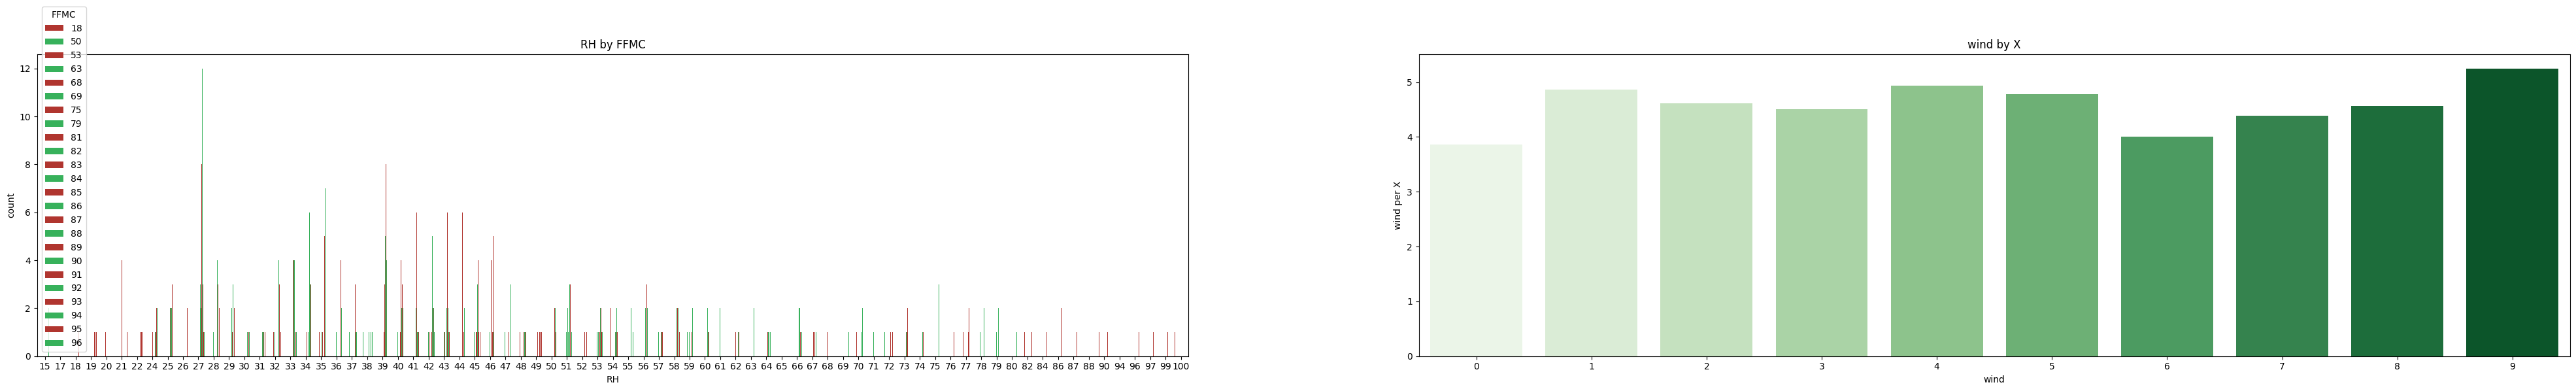

In [ ]:
fig, axarr = plt.subplots(1,2,figsize=(50,6))
a = sns.countplot(x='RH', hue='FFMC', data=df, palette=('#C52219', '#23C552'), ax=axarr[0]).set_title('RH by FFMC')
ax=axarr[1].set_title('wind by X')
b = sns.barplot(x='wind', y='X', data=df, palette="Greens", errorbar=None, ax=axarr[1]).set_ylabel('wind per X')

In [ ]:
dataset = df.copy()
dataset.head()

,X,Y,month,day,FFMC,DMC,DC,temp,RH,wind,rain,area
0,7,5,mar,fri,86,26.2,94,8.2,51,6,0,0
1,7,4,oct,tue,90,35.4,669,18.0,33,0,0,0
2,7,4,oct,sat,90,43.7,686,14.6,33,1,0,0
3,8,6,mar,fri,91,33.3,77,8.3,97,4,0.2,0
4,8,6,mar,sun,89,51.3,102,11.4,99,1,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding
encoder = LabelEncoder() # method initialization

# Looping for columns except Survived
for c in dataset.columns[1:]:
    if(dataset[c].dtype=='object'): # if column type = object (like "Tiket" and "Sex")
        dataset[c] = encoder.fit_transform(dataset[c])
    else: # else get the self column value without encode
        dataset[c] = dataset[c]

dataset.head()

,X,Y,month,day,FFMC,DMC,DC,temp,RH,wind,rain,area
0,7,3,7,0,86,109,94,8.2,51,6,0,0
1,7,2,10,5,90,134,669,18.0,33,0,0,0
2,7,2,10,2,90,144,686,14.6,33,1,0,0
3,8,4,7,0,91,133,77,8.3,97,4,1,0
4,8,4,7,3,89,154,102,11.4,99,1,0,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    int64  
 3   day     517 non-null    int64  
 4   FFMC    517 non-null    int64  
 5   DMC     517 non-null    int64  
 6   DC      517 non-null    int64  
 7   temp    517 non-null    float64
 8   RH      517 non-null    int64  
 9   wind    517 non-null    int64  
 10  rain    517 non-null    int64  
 11  area    517 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 52.5 KB
